# **Task Breakdown and Connection to the Decomposition-Based Approach**
## Adopted from Task 1 Answer
## By: Sibikrishnan A.G.

#### **Task Context**
1. **Objective**:
   - To **analyze natural gas price data** and provide **granular estimates** for any arbitrary date (historical or future).
   - To **extrapolate data for one additional year** to enable pricing of storage contracts for long-term planning.
   - To account for **seasonal trends** that naturally affect natural gas prices.

2. **Use Case**:
   - The primary users are commodity trading desks, including firms looking to exploit **seasonal price differentials** (e.g., buying gas in summer when prices are low and selling in winter when prices peak).
   - Accurate extrapolations and granular pricing are critical for **pricing storage contracts** and **hedging risks**.

3. **Challenges**:
   - Limited granularity: Data is only available as **monthly snapshots**.
   - Seasonal trends: Natural gas prices are influenced by **cyclical patterns** (e.g., increased demand during winter).
   - Future uncertainty: Requires extrapolation beyond the available dataset.

---

#### **Why the Decomposition-Based Approach?**
The decomposition-based approach aligns well with the task requirements because it:
1. **Separates Trend and Seasonality**:
   - **Trend**: Captures the overall increase or decrease in prices over time.
   - **Seasonality**: Models recurring annual patterns (e.g., higher prices in winter due to increased heating demand).
   
2. **Granular Estimation**:
   - By modeling both trend and seasonality explicitly, the method can **interpolate prices for any arbitrary date** within the historical range.
   - Extrapolation uses the **linear trend** and **seasonal component** to predict future prices with granularity.

3. **Predictive Simplicity and Interpretability**:
   - The model is interpretable, enabling stakeholders (e.g., commodity traders) to understand how trends and seasonal effects drive price changes.

---

#### **Methodology: Connection Between Task and Approach**

**1. Data Preparation**
- The task requires granular analysis, which means working with **time series data** and ensuring proper alignment of dates.
- The decomposition approach handles this by:
  - Calculating the **number of days since the start date** for linear regression.
  - Aligning **dates and prices** to create a consistent dataset for analysis.

---

**2. Trend Modeling**
- **Connection to Task**:
  - The storage contracts depend on a long-term view of natural gas prices. Capturing the **upward or downward trend** ensures the model reflects macroeconomic forces affecting supply and demand.
- **Method**:
  - A **simple linear regression** models the trend: $ \text{Price}(t) = \text{slope} \cdot t + \text{intercept} $

  - The **slope** represents the rate of price change over time, while the **intercept** captures the baseline price.

---

**3. Seasonal Modeling**
- **Connection to Task**:
  - Seasonal price fluctuations directly affect decisions on **when to store or sell gas**.
  - Capturing **annual periodicity** ensures the model reflects intra-year variations, such as higher winter demand and lower summer demand.
- **Method**:
  - A **sinusoidal model** is used for seasonality:
      $$
      \text{Seasonal Component}(t) = A \sin\left(\frac{2\pi t}{365} + z\right)
      $$
  - Here:
    - \(A\): Amplitude, representing the magnitude of price fluctuations.
    - \(z\): Phase shift, aligning the sine wave to seasonal peaks and troughs.

---

**4. Combined Model**
- **Connection to Task**:
  - The task requires both **interpolation for past dates** and **extrapolation for future dates**. Combining trend and seasonality enables granular, accurate estimates.
- **Method**:
  - The combined model is:
    $$
    \text{Price}(t) = A \sin\left(\frac{2\pi t}{365} + z\right) + \text{slope} \cdot t + \text{intercept}
    $$
  - This equation forms the basis for:
    - **Interpolating past prices** using exact matches or estimates from the model.
    - **Extrapolating future prices** by extending the trend and seasonality components.

---

**5. Interpolation and Extrapolation**
- **Connection to Task**:
  - The task explicitly requires granular estimates for arbitrary dates, making interpolation and extrapolation essential.
- **Method**:
  - For exact matches: Return historical data.
  - For interpolation/extrapolation:
    - Use the combined model to estimate prices for any date.

---

#### **Key Calculations**
1. **Trend**:
   - **Linear regression** to calculate slope and intercept.
   - Formula for slope (\(A\)) and intercept (\(B\)):
    $$
    \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, \quad \hat{B} = \bar{y} - \hat{A} \cdot \bar{x}
    $$
2. **Seasonality**:
   - Fit a sinusoidal model using **bilinear regression**:
    $$
    \text{u} = A \cos(z), \quad \text{w} = A \sin(z)
    $$

   - Recover amplitude (\(A\)) and phase shift (\(z\)):
    $$
    A = \sqrt{u^2 + w^2}, \quad z = \tan^{-1}\left(\frac{w}{u}\right)
    $$
3. **Interpolation/Extrapolation**:
   - Combine trend and seasonal components:
    $$
    \text{Price}(t) = A \sin\left(\frac{2\pi t}{365} + z\right) + \text{slope} \cdot t + \text{intercept}
    $$


---

### **Conclusion**
The decomposition-based approach:
1. **Addresses Task Requirements**:
   - Captures seasonal trends critical for pricing storage contracts.
   - Provides granular estimates for arbitrary dates (past and future).

2. **Uses Domain Knowledge**:
   - Seasonal demand patterns in natural gas guide the sinusoidal model.
   - Long-term price trends are reflected in the linear regression.

3. **Ensures Interpretability**:
   - The explicit separation of trend and seasonality provides stakeholders with clear insights into how prices evolve over time.

This approach effectively balances task requirements with mathematical rigor, enabling accurate and actionable price estimates.

In [1]:
# 1. Import Required Libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta


<ipython-input-2-c59d6f17a349>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])


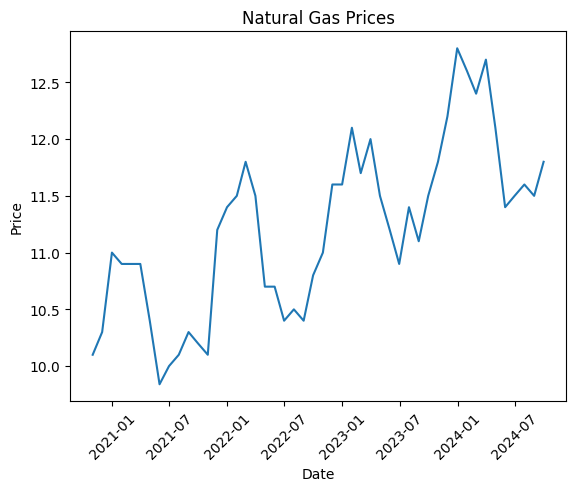

In [2]:
# 2. Load and Prepare Data

# Load the dataset
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])

# Extract prices and dates
prices = df['Prices'].values
dates = df['Dates'].values

# Plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)
plt.show()


In [3]:
# 3. Calculate Days from Start for Linear Regression

# Define the start and end dates
start_date = date(2020, 10, 31)
end_date = date(2024, 9, 30)

# Generate a list of month-end dates
months = []
year = start_date.year
month = start_date.month + 1

while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

# Calculate days from the start date
days_from_start = [(day - start_date).days for day in months]


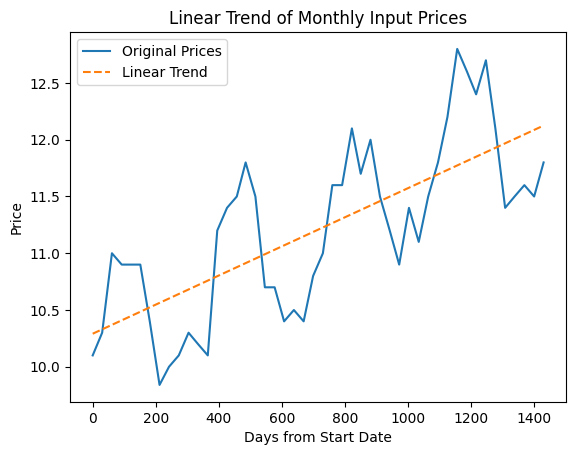

Slope: 0.001282373598760221, Intercept: 10.29104112595228


In [4]:
# 4. Perform Simple Linear Regression for Trend

# Define a function for simple linear regression
def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
    intercept = ybar - slope * xbar
    return slope, intercept

# Perform regression
time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot the linear trend
plt.plot(time, prices, label='Original Prices')
plt.plot(time, time * slope + intercept, label='Linear Trend', linestyle='--')
plt.xlabel('Days from Start Date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.legend()
plt.show()

print(f"Slope: {slope}, Intercept: {intercept}")


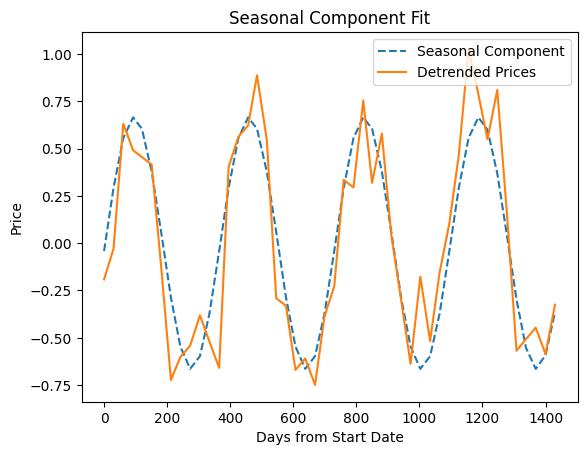

Amplitude: 0.6657921292706733, Phase Shift: -0.062231138772283846


In [5]:
# 5. Fit Sinusoidal Model for Seasonal Variation

# Calculate detrended prices
sin_prices = prices - (time * slope + intercept)

# Generate sine and cosine components
sin_time = np.sin(time * 2 * np.pi / 365)  # Assuming annual seasonality (365 days)
cos_time = np.cos(time * 2 * np.pi / 365)

# Define a function for bilinear regression
def bilinear_regression(y, x1, x2):
    slope1 = np.sum(y * x1) / np.sum(x1**2)
    slope2 = np.sum(y * x2) / np.sum(x2**2)
    return slope1, slope2

# Perform bilinear regression
slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# Recover amplitude and phase shift
amplitude = np.sqrt(slope1**2 + slope2**2)
shift = np.arctan2(slope2, slope1)

# Plot the seasonal component
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift), label='Seasonal Component', linestyle='--')
plt.plot(time, sin_prices, label='Detrended Prices')
plt.xlabel('Days from Start Date')
plt.ylabel('Price')
plt.title('Seasonal Component Fit')
plt.legend()
plt.show()

print(f"Amplitude: {amplitude}, Phase Shift: {shift}")



In [6]:
# 6. Define Interpolation/Extrapolation Function

# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept


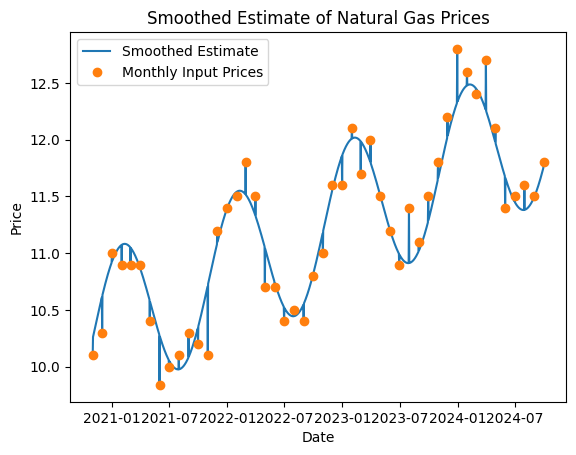

In [7]:
# 7. Plot the Full Smoothed Estimate

# Create a range of continuous dates from start to end
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')
plt.plot(dates, prices, 'o', label='Monthly Input Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Smoothed Estimate of Natural Gas Prices')
plt.legend()
plt.show()


In [9]:
# 8. Extrapolate Data by 1 Year

# Extend the time range by 365 days
extrapolated_dates = pd.date_range(start=pd.Timestamp(months[-1]) + timedelta(days=1), periods=365, freq='D')

# Calculate days from the start date for extrapolated dates
extrapolated_days = [(date - pd.Timestamp(start_date)).days for date in extrapolated_dates]

# Extrapolate trend and seasonality for the new dates
extrapolated_trend = [slope * day + intercept for day in extrapolated_days]
extrapolated_seasonal = [amplitude * np.sin(day * 2 * np.pi / 365 + shift) for day in extrapolated_days]

# Combine trend and seasonality to get the extrapolated prices
extrapolated_prices = [trend + seasonal for trend, seasonal in zip(extrapolated_trend, extrapolated_seasonal)]

# Combine the historical and extrapolated data
forecasted_dates = list(months) + list(extrapolated_dates)
forecasted_prices = list(prices) + extrapolated_prices



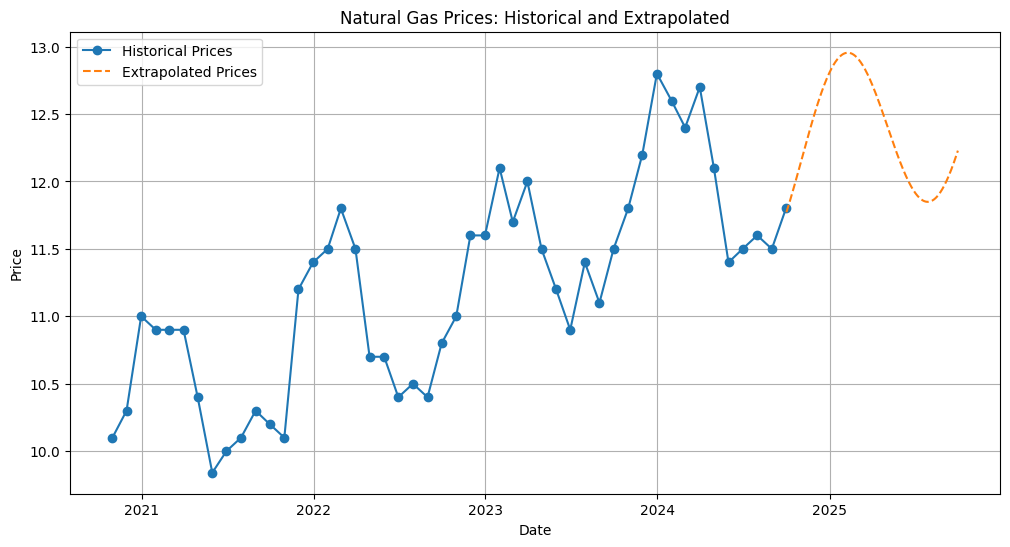

In [10]:
# 9. Visualize Extrapolated Data

# Plot the historical and extrapolated data
plt.figure(figsize=(12, 6))
plt.plot(months, prices, label='Historical Prices', marker='o')
plt.plot(extrapolated_dates, extrapolated_prices, label='Extrapolated Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices: Historical and Extrapolated')
plt.legend()
plt.grid()
plt.show()


In [11]:
# 10. User Query for Price

#Define a function to compute price for any given date
def get_price_for_date(query_date):
    """
    Get the price for a specific date, using the combined trend + seasonal model.
    :param query_date: str, date in 'YYYY-MM-DD' format
    :return: float, predicted price
    """
    query_date = pd.Timestamp(query_date)
    query_days = (query_date - pd.Timestamp(start_date)).days

    # Check if the query date is within the historical or extrapolated range
    if query_date in forecasted_dates:
        return forecasted_prices[forecasted_dates.index(query_date)]
    else:
        # Compute the price using the trend and seasonal model
        query_trend = slope * query_days + intercept
        query_seasonal = amplitude * np.sin(query_days * 2 * np.pi / 365 + shift)
        return query_trend + query_seasonal

# Example usage: Query price for a specific date
query_date = input("Enter a date (YYYY-MM-DD) to get the price: ")
predicted_price = get_price_for_date(query_date)
print(f"The predicted price for {query_date} is: {predicted_price:.2f} USD")


Enter a date (YYYY-MM-DD) to get the price: 2025-03-26
The predicted price for 2025-03-26 is: 12.77 USD
